In [30]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import cv2
import keras
import numpy as np
from keras.models import load_model
from keras.preprocessing import image
from keras.utils.generic_utils import CustomObjectScope
from keras.applications import MobileNet
#from keras.applications.mobilenet import DepthwiseConv2D, relu6

IMAGE_SIZE=224
#with CustomObjectScope({'relu6': keras.applications.mobilenet.relu6,'DepthwiseConv2D': keras.applications.mobilenet.DepthwiseConv2D}):
model = load_model('/content/gdrive/My Drive/app/face_boss/boss_model/model.h5')

def prepare_image(img):
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

def predict(img):
    """
    Predict face crop from frame
    :param img:
    :return: If boss is appear when open the code IDE
    """
    try:
        img = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE), interpolation=cv2.INTER_AREA)
        probs = model.predict(prepare_image(img))
        is_boss = np.argmax(probs[0])
        return is_boss
    except:
        return False

In [0]:
import dlib
hog_face_detector = dlib.get_frontal_face_detector()
#model = load_model('/content/gdrive/My Drive/app/face_boss/boss_model/model.h5')

In [129]:
scale = 0.5
frame = cv2.imread('/content/gdrive/My Drive/app/data/tuquynhmoon/tu/45.png')
#frame = cv2.imread('/content/gdrive/My Drive/app/face_boss/data/boss/21.jpg')
resize_frame = cv2.resize(frame, (int(frame.shape[1]*scale), int(frame.shape[0]*scale)))
faces_hog = hog_face_detector(resize_frame)
frame_h, frame_w, _ = frame.shape
#print(frame_h)
#print(frame_w)
reindex_x = lambda x: max(min(x, frame_w), 1)
reindex_y = lambda x: max(min(x, frame_h), 1)

# loop over detected faces
for face in faces_hog:
  x = reindex_x(int(face.left() / scale))
  y = reindex_y(int(face.top() / scale))
  r = reindex_x(int(face.right() / scale))
  b = reindex_y(int(face.bottom() / scale))
  # draw box over face
  crop_face = frame[y-15: b, x: r]
  is_boss = predict(frame)
  print(is_boss)
  print(x)
  print(y)
  print(r)
  print(b)
  if is_boss:
    cv2.putText(frame, "BOSS", (10, 100), cv2.FONT_HERSHEY_SIMPLEX, 1,
                            (0, 0, 255), 2)
    cv2.rectangle(frame, (x, y-15), (r, b), (0, 0, 255), 2)
  else:
    cv2.putText(frame, "NORMAL", (10, 100), cv2.FONT_HERSHEY_SIMPLEX, 1,
                            (0, 255, 0), 2)
    cv2.rectangle(frame, (x, y-15), (r, b), (0, 255, 0), 2)

0
70
148
428
508


(375, 358, 3)


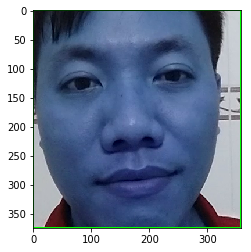

In [130]:
import matplotlib.pyplot as plt

#frame = cv2.resize(frame,(900,900))
#plt.imshow(frame)
#crop_face = cv2.resize(crop_face,(900,900))
print(crop_face.shape)
plt.imshow(crop_face)

(577, 476, 3)


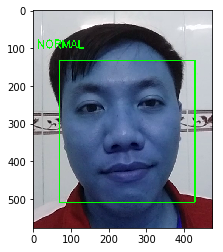

In [131]:
#frame = cv2.resize(frame,(900,900))
print(frame.shape)
plt.imshow(frame)